In [ ]:
import cv2 
import numpy as np
import glob

path = glob.glob("thresholdb\*.png")
output_path='lung/erodeb'
c=0

for file in path:

        img = cv2.imread(file)
       
        smoothed_img = cv2.erode(img, None, iterations=1)
        cv2.imwrite(f'erodeb/benign{c}.png',smoothed_img)
        c+=1
        cv2.waitKey(0)

        cv2.destroyAllWindows()



In [ ]:
   
import cv2

import glob

path = glob.glob("erodeb\*.png")
output_path='lung/dilateb'
c=0

for file in path:

        img = cv2.imread(file)
       
        smoothed_img = cv2.dilate(img, None, iterations=1)
        cv2.imwrite(f'dilateb/benign{c}.png',smoothed_img)
        c+=1
        cv2.waitKey(0)

        cv2.destroyAllWindows()



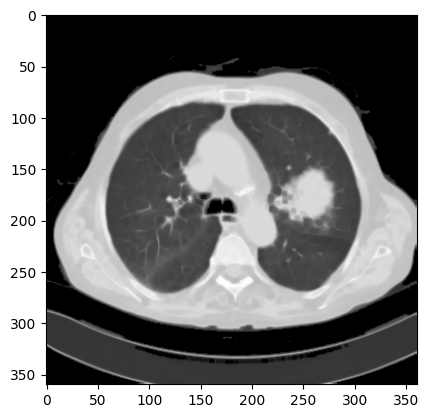

In [1]:
import cv2
import matplotlib.pyplot as plt

import glob
img = cv2.imread("th.png")
       
smoothed_img = cv2.erode(img, None, iterations=1)
plt.imshow(smoothed_img)

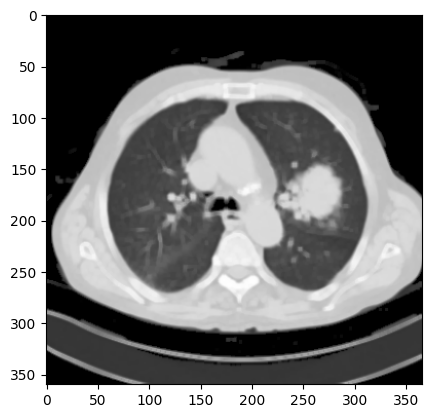

In [3]:
import cv2
import matplotlib.pyplot as plt

import glob
img = cv2.imread("wr.png")
       
smoothed_img = cv2.dilate(img, None, iterations=1)
plt.imshow(smoothed_img)

In [ ]:

import cv2
import matplotlib.pyplot as plt
import imutils
source=cv2.imread("benign0.png")

cnts = cv2.findContours(source, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points

extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])


# add contour on the image
img_cnt = cv2.drawContours(source.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = source[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


NameError: name 'img_cnt' is not defined

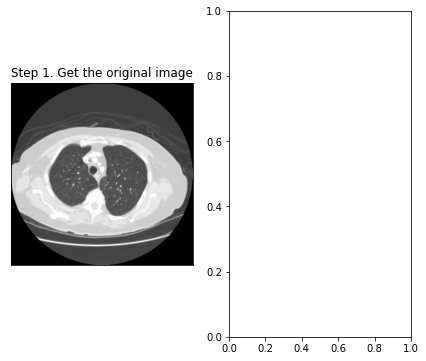

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(source)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()